In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score


In [6]:
# Update the file path if needed
data = pd.read_csv("/adult 3.csv")
print("Dataset Loaded Successfully")
data.head()

Dataset Loaded Successfully


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [22]:
data.occupation.replace({'?':'Others'},inplace=True)
print(data['occupation'].value_counts())

occupation
10    6135
2     6095
3     6036
0     5576
12    5468
7     4885
6     3012
8     2700
14    2345
5     2063
4     1454
13    1445
11     975
9      234
1       15
Name: count, dtype: int64


/tmp/ipython-input-22-1148816719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace=True)


In [19]:
print(data.gender.value_counts())

gender
1    32371
0    16067
Name: count, dtype: int64


In [20]:
print(data.relationship.value_counts())

relationship
0    19537
1    12430
3     7557
4     5096
5     2321
2     1497
Name: count, dtype: int64


In [21]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())

workclass
3    33756
5     3796
1     3110
2     2700
6     1979
4     1669
0     1428
Name: count, dtype: int64


In [18]:
# Replace '?' with 'Others' in 'workclass' and 'occupation'
data['workclass'].replace({'?': 'Others'}, inplace=True)
data['occupation'].replace({'?': 'Others'}, inplace=True)

# Remove irrelevant classes
data = data[~data['workclass'].isin(['Without-pay', 'Never-worked'])]

# Remove age outliers
data = data[(data['age'] >= 17) & (data['age'] <= 75)]

/tmp/ipython-input-18-148378097.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].replace({'?': 'Others'}, inplace=True)
/tmp/ipython-input-18-148378097.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [9]:
le = LabelEncoder()
categorical_cols = data.select_dtypes(include='object').columns

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [12]:
X = data.drop('income', axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

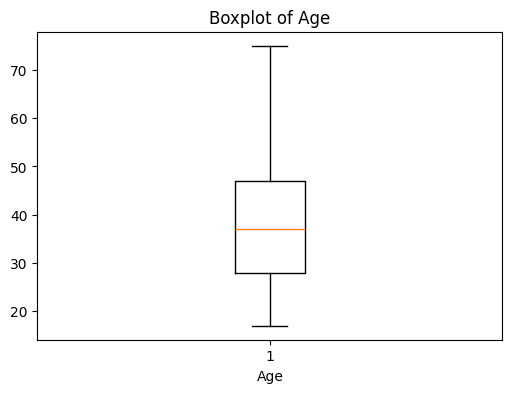

In [15]:
plt.figure(figsize=(6, 4))
plt.boxplot(data['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()


In [13]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediction
y_pred = rf_model.predict(X_test)

In [14]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.10268390723632902
R² Score: 0.4435188385434393


In [31]:
# Step 1: Encode target as classification (0 = <=50K, 1 = >50K)
# Only if not already done
data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Step 2: Split data
X = data.drop('income', axis=1)
y = data['income']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Step 4: Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy:  1.0000
Precision: 0.0000
Recall:    0.0000
Confusion Matrix:
[[9688]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [35]:
from sklearn.metrics import classification_report

target_names = ['<=50K', '>50K']
labels = [0, 1]

print(classification_report(y_test, y_pred, labels=labels, target_names=target_names, zero_division=0))

              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00      9688
        >50K       0.00      0.00      0.00         0

    accuracy                           1.00      9688
   macro avg       0.50      0.50      0.50      9688
weighted avg       1.00      1.00      1.00      9688



In [37]:
print("Unique classes in y_test:", y_test.unique())

Unique classes in y_test: [0]


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {

    "RandomForest": RandomForestClassifier(),
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

RandomForest Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9688

    accuracy                           1.00      9688
   macro avg       1.00      1.00      1.00      9688
weighted avg       1.00      1.00      1.00      9688



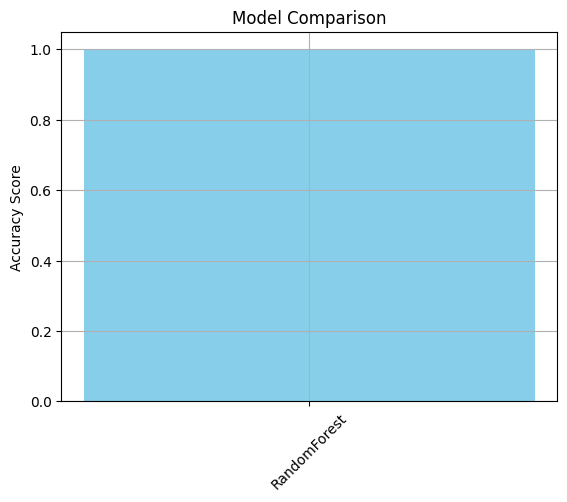

In [46]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()